In [2]:
import sys
import os 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
sys.path.append("C:\\Users\\markp\\repos\\suite2p_processing")
# sys.path.append("C:\\Users\\mplitt\\s2p_processing")
import s2p_preprocessing as s2p_pp
import suite2p as s2p
from glob import glob
import h5py



%matplotlib inline
%load_ext autoreload
%autoreload 2

In [21]:
basedir = "E:\\2P_Data"

mouse = '4343717.2'
date = '20_03_2020'
scene = 'TwoTower_foraging'
session = "002"
scannum = "008"
scan = "%s_%s_%s" % (scene,session,scannum)


# data_path = glob(os.path.join("E:\\2P_Data\\",mouse,date,task,task+"_"  + session + "*.mat"))[0]

In [22]:
info_path = os.path.join(basedir,mouse,date,scene,scan+".mat")
info = s2p_pp.loadmat(info_path)
for k,v in info.items():
    print(k,v)

frame [  133   133   133 ... 35227 35228 35230]
line [ 43 172 333 ...  72 275 461]
event_id [1 1 1 ... 1 1 1]
resfreq 7916
postTriggerSamples 5000
recordsPerBuffer 512
bytesPerBuffer 10240000
channels 1
ballmotion []
abort_bit 0
scanbox_version 2
scanmode 1
config {'wavelength': 980, 'frames': 0, 'lines': 512, 'magnification': 3, 'magnification_list': array(['1.0', '1.2', '1.4', '1.7', '2.0', '2.4', '2.8', '3.4', '4.0',
       '4.8', '5.7', '6.7', '8.0'], dtype='<U3'), 'pmt0_gain': 0.68, 'pmt1_gain': 0.74, 'knobby': {'pos': {'x': -0.29, 'y': -3.53, 'z': -1124.37, 'a': 10}, 'schedule': array([[  0,   0,  10,   0,  30],
       [  0,   0,  10,   0,  60],
       [  0,   0,  10,   0,  90],
       [  0,   0,  10,   0, 120],
       [  0,   0,  10,   0, 150],
       [  0,   0,  10,   0, 180]], dtype=uint8)}}
sz [512 796]
otwave []
otwave_um []
otparam []
otwavestyle 1
volscan 0
power_depth_link 0
opto2pow []
area_line 1
calibration [<scipy.io.matlab.mio5_params.mat_struct object at 0x000001B52

In [23]:
outpath = os.path.join(basedir,mouse,date,scene,scan)
try: 
    os.makedirs(outpath)
except:
    print("dir creation failed")

In [24]:

h5path = s2p_pp.sbx2h5(outpath,output_name=os.path.join(outpath,scan+".h5"))

0
1630208 1000
0
0 1000
1000
1630208 1000
1630208000
1000 2000
2000
1630208 1000
3260416000
2000 3000
3000
1630208 1000
4890624000
3000 4000
4000
1630208 1000
6520832000
4000 5000
5000
1630208 1000
8151040000
5000 6000
6000
1630208 1000
9781248000
6000 7000
7000
1630208 1000
11411456000
7000 8000
8000
1630208 1000
13041664000
8000 9000
9000
1630208 1000
14671872000
9000 10000
10000
1630208 1000
16302080000
10000 11000
11000
1630208 1000
17932288000
11000 12000
12000
1630208 1000
19562496000
12000 13000
13000
1630208 1000
21192704000
13000 14000
14000
1630208 1000
22822912000
14000 15000
15000
1630208 1000
24453120000
15000 16000
16000
1630208 1000
26083328000
16000 17000
17000
1630208 1000
27713536000
17000 18000
18000
1630208 1000
29343744000
18000 19000
19000
1630208 1000
30973952000
19000 20000
20000
1630208 1000
32604160000
20000 21000
21000
1630208 1000
34234368000
21000 22000
22000
1630208 1000
35864576000
22000 23000
23000
1630208 1000
37494784000
23000 24000
24000
1630208 1000


In [25]:
ops = s2p_pp.set_ops(d={'nplanes':1,
                        'fast_disk':[],
                        'fs':info['frame_rate'],
                        'roidetect':True,
                        'input_format':"h5",
                        'nchannels':info['channels'],
                       'sparse_mode':True,
                        'h5py':h5path,
                       'save_path0':outpath,
                       'aspect':512./796.})

In [26]:
ops = s2p.run_s2p.run_s2p(ops=ops)

{}
h5
time 1250.17 sec. Wrote h5py to binaries for 1 planes
>>>>>>>>>>>>>>>>>>>>> PLANE 0 <<<<<<<<<<<<<<<<<<<<<<
----------- REGISTRATION
registering 35230 frames
NOTE: estimated bidiphase offset from data: 0 pixels
Reference frame, 39.91 sec.
2500/35230 frames, 165.62 sec.
5000/35230 frames, 329.04 sec.
7500/35230 frames, 498.12 sec.
10000/35230 frames, 682.48 sec.
12500/35230 frames, 861.89 sec.
15000/35230 frames, 1036.59 sec.
17500/35230 frames, 1197.77 sec.
20000/35230 frames, 1356.62 sec.
22500/35230 frames, 1527.69 sec.
25000/35230 frames, 1699.46 sec.
27500/35230 frames, 1883.34 sec.
30000/35230 frames, 2062.58 sec.
32500/35230 frames, 2241.98 sec.
35000/35230 frames, 2412.54 sec.
35230/35230 frames, 2427.87 sec.
bad frames file path: E:\2P_Data\4343717.2\20_03_2020\TwoTower_foraging\TwoTower_foraging_002_008\bad_frames.npy
----------- Total 2470.52 sec
Registration metrics, 73.84 sec.
----------- ROI DETECTION AND EXTRACTION
Binning movie in chunks of length 15
Binned movie [2

C:\Users\markp\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


After removing overlaps, 1581 ROIs remain
Masks made in 73.43 sec.
Extracted fluorescence from 1581 ROIs in 35230 frames, 715.39 sec.
----------- Total 1292.30 sec.
----------- SPIKE DECONVOLUTION
----------- Total 275.83 sec.
Plane 0 processed in 4118.72 sec (can open in GUI).
total = 1648.20 sec.
TOTAL RUNTIME 1650.05 sec


In [29]:
ops = np.load(os.path.join("E:\\4343705.1\\13_01_2020\\TwoTower_noTimeout\\suite2p\\plane0\\","ops.npy"))

In [30]:
ops =ops.tolist()

In [31]:
ops.keys()

dict_keys(['look_one_level_down', 'fast_disk', 'delete_bin', 'mesoscan', 'h5py', 'h5py_key', 'save_path0', 'save_folder', 'subfolders', 'nplanes', 'nchannels', 'functional_chan', 'tau', 'fs', 'force_sktiff', 'preclassify', 'save_mat', 'combined', 'aspect', 'do_bidiphase', 'bidiphase', 'do_registration', 'keep_movie_raw', 'nimg_init', 'batch_size', 'maxregshift', 'align_by_chan', 'reg_tif', 'reg_tif_chan2', 'subpixel', 'smooth_sigma', 'th_badframes', 'pad_fft', 'nonrigid', 'block_size', 'snr_thresh', 'maxregshiftNR', '1Preg', 'spatial_hp', 'pre_smooth', 'spatial_taper', 'roidetect', 'sparse_mode', 'diameter', 'spatial_scale', 'connected', 'nbinned', 'max_iterations', 'threshold_scaling', 'max_overlap', 'high_pass', 'inner_neuropil_radius', 'min_neuropil_pixels', 'allow_overlap', 'chan2_thres', 'baseline', 'win_baseline', 'sig_baseline', 'prctile_baseline', 'neucoeff', 'xrange', 'yrange', 'data_path', 'save_path', 'ops_path', 'reg_file', 'meanImg', 'nframes', 'Ly', 'Lx', 'yblock', 'xbloc

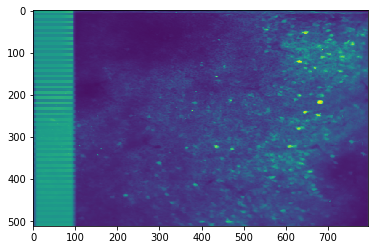

In [28]:
f,ax = plt.subplots()
ax.imshow(ops['meanImg'])

In [60]:
stat = np.load("G:\\My Drive\\2P_Data\\Syt3KO\\4343705.1\\13_01_2020\\TwoTower_noTimeout\\TwoTower_noTimeout_002_007\\suite2p\\plane0\\stat.npy")
res_ops = np.load("G:\\My Drive\\2P_Data\\Syt3KO\\4343705.1\\13_01_2020\\TwoTower_noTimeout\\TwoTower_noTimeout_002_007\\suite2p\\plane0\\ops.npy").item()

In [61]:
print(len(stat))

1740


In [59]:
for k,v in res_ops.items():
    print(k)

look_one_level_down
fast_disk
delete_bin
mesoscan
h5py
h5py_key
save_path0
save_folder
subfolders
nplanes
nchannels
functional_chan
tau
fs
force_sktiff
preclassify
save_mat
combined
aspect
do_bidiphase
bidiphase
do_registration
keep_movie_raw
nimg_init
batch_size
maxregshift
align_by_chan
reg_tif
reg_tif_chan2
subpixel
smooth_sigma
th_badframes
pad_fft
nonrigid
block_size
snr_thresh
maxregshiftNR
1Preg
spatial_hp
pre_smooth
spatial_taper
roidetect
sparse_mode
diameter
spatial_scale
connected
nbinned
max_iterations
threshold_scaling
max_overlap
high_pass
inner_neuropil_radius
min_neuropil_pixels
allow_overlap
chan2_thres
baseline
win_baseline
sig_baseline
prctile_baseline
neucoeff
xrange
yrange
data_path
save_path
ops_path
reg_file
meanImg
nframes
Ly
Lx
yblock
xblock
nblocks
NRsm
refImg
yoff
xoff
corrXY
yoff1
xoff1
corrXY1
badframes
spatscale_pix
max_proj
Lyc
Lxc
Vcorr
sdmov
meanImgE
Vmap
Vmax
ihop
Vsplit


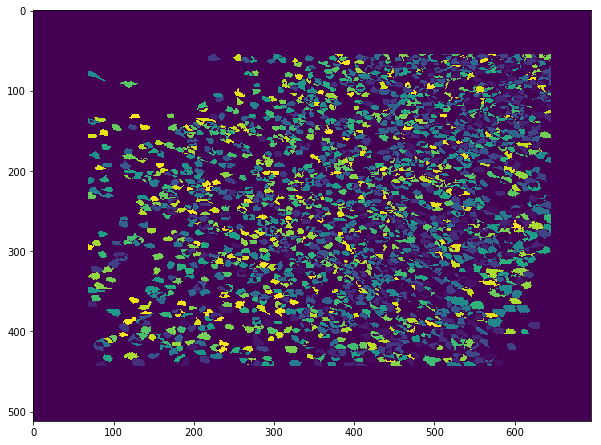

In [63]:
im = np.zeros((res_ops['Ly'], res_ops['Lx']))

for n in range(0,len(stat)):
    ypix = stat[n]['ypix'][~stat[n]['overlap']]
    xpix = stat[n]['xpix'][~stat[n]['overlap']]
    im[ypix,xpix] = n+1
f,ax = plt.subplots(figsize = [10,10])
ax.imshow(im)


In [93]:
%matplotlib qt
f,ax = plt.subplots(1,3,figsize=[20,5])
ax[0].imshow(im)
ax[1].imshow(rawdata.mean(axis=0))
ax[2].imshow((im>=1)*rawdata.mean(axis=0))
f.show()

(array([  334.,  1842.,  8645., 12755., 14380., 16188., 16773.,  7597.,
         4566.,  3103.]),
 array([ 6.8915753,  7.241946 ,  7.5923176,  7.9426885,  8.293059 ,
         8.643431 ,  8.993801 ,  9.3441725,  9.694544 , 10.044914 ,
        10.395286 ], dtype=float32),
 <a list of 10 Patch objects>)

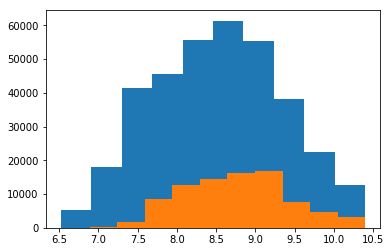

In [90]:
f,ax = plt.subplots()
ax.hist(np.log(rawdata).mean(axis=0).ravel())
ax.hist(np.log(rawdata[:,im>0]).mean(axis=0).ravel())

In [110]:
f,ax = plt.subplots()
ax.imshow(np.log(rawdata.mean(axis=0)))

In [152]:
mouse = '4343705.3'
session = 'sess1'

base = os.path.join("E:\\",mouse,session,session+"_002_006")
mat_path = base + ".mat"
info = s2p_pp.loadmat(mat_path)
for k,v in info.items():
    print(k,v)

resfreq 7916
postTriggerSamples 9000
recordsPerBuffer 512
bytesPerBuffer 9216000
channels 3
ballmotion []
abort_bit 0
scanbox_version 2
scanmode 0
config {'wavelength': 1100, 'frames': 7000, 'lines': 512, 'magnification': 1, 'magnification_list': array(['1.0', '1.2', '1.4', '1.7', '2.0', '2.4', '2.8', '3.4', '4.0',
       '4.8', '5.7', '6.7', '8.0'], dtype='<U3'), 'pmt0_gain': 0.74, 'pmt1_gain': 0.74, 'knobby': {'pos': {'x': -79.75, 'y': 7.46, 'z': -4.92, 'a': 10}, 'schedule': array([[  0,   0,  10,   0,  30],
       [  0,   0,  10,   0,  60],
       [  0,   0,  10,   0,  90],
       [  0,   0,  10,   0, 120],
       [  0,   0,  10,   0, 150],
       [  0,   0,  10,   0, 180]], dtype=uint8)}}
sz [512 796]
otwave [ 488  501  514  527  541  554  566  579  592  605  617  630  642  654
  666  678  690  702  714  725  737  748  760  771  782  794  805  816
  827  838  849  860  870  881  892  913  924  934  944  955  965  975
  986  996 1006 1016 1026 1036 1045 1055 1065 1075 1084 1094 1103

In [154]:
rawh5fname = s2p_pp.sbx2h5(base,channel_i=0)
with h5py.File(rawh5fname,'r') as f:
    rawdata = f['data'][:,:,:]

    


0
815104 1000
0
0 1000
1000
815104 1000
815104000
1000 2000
2000
815104 1000
1630208000
2000 3000
3000
815104 1000
2445312000
3000 4000
4000
815104 1000
3260416000
4000 5000
5000
815104 1000
4075520000
5000 6000
6000
815104 999
4890624000
6000 6999


In [131]:
print(rawdata.shape)

(999, 512, 696)


In [141]:
np.savetxt(base+"_maxzstack.txt",rawdata.mean(axis=0))
# with h5py.File(os.path.join("E:\\",mouse,session,session+"_001_003_maxzstack.h5"),'w') as f:
#     dset = f.create_dataset('data',(512,696))
#     dset[:,:]=np.mean(rawdata,axis=0)
#     f.flush()

In [155]:
with h5py.File(base+"_maxzstack.h5",'w') as f:
    dset = f.create_dataset('data',(70,512,696))
    for i in range(70):
        slc = rawdata[i::70,:,:]
        print(slc.shape)
        dset[i,:,:]=np.mean(slc,axis=0)
        f.flush()

(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 512, 696)
(100, 51

In [ ]:
# load aligned data